In [115]:
# Getting a list of Nightclubs in San Francisco
# We want to demostrate the use of APIs

# Dependencies (don't need all of the)
import requests
import json
import os
import gmaps
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import requests
import time
import requests
from pandas import DataFrame
from pandas.io.json import json_normalize 

# Google  API key
from config import gkey

gmaps.configure(api_key=gkey)

In [116]:
target_coordinates = "37.7749,-122.4194"
target_search = "Nightclub"
target_radius = 50000
target_type = "nightclub"

# Setting up parameters
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

In [117]:
print(response)

<Response [200]>


In [118]:

# convert response to json
sf_clubs = response.json()

# Print the json (pretty printed)
print(json.dumps(sf_clubs, indent=4, sort_keys=True))

{
    "html_attributions": [],
    "next_page_token": "CrQCKwEAAAFwpI-bm7c4fygrxvQWZ1t7IoOdFi__jf3-_uNhwW5sWEGSi0cwFz2l5AdZ6wzqkpHCRXsipSO9xaapxsBGTNXSLUshLWKKRqNNfVDAzyKlXnvrvYxH5WRLXPO4Tssovxrv_1kcMBeVDqNa9BuZPT4tCGzKW8Pv0TgnGY_k98drvtBhECtsTrLq0x8fHtprPqu27aSosPlrLzqlfa-G6v_juFcNBjkB48jSJmZdYEnoSj7uKayCirn20QcO_6wC_aja_85FaigQlgTFd52YBBoc9nqUF6695dCKYp5Z-gcbUBOLZ9b9XxKX3BaGgoVRC6sVddJJbStxSwO8kzR7FkaXOzRwFB22WI1IjLWWTjzP3pYA-72hzGTRIL72QE8ZN_N_3XzDSatiCxUy5R3sl6MSEH5yzl6WCE-XHr5FVPBCxcQaFGzemMvuygg9jeNDfg_Q9c2LIwEf",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 37.3768037,
                    "lng": -122.0298038
                },
                "viewport": {
                    "northeast": {
                        "lat": 37.37818862989272,
                        "lng": -122.0286148701073
                    },
                    "southwest": {
                        "lat": 37.37548897010728,
                    

In [119]:

# Print the name and address of the first restaurant that appears

print(sf_clubs["results"][1]["name"])
print(sf_clubs["results"][1]["vicinity"])
print(sf_clubs["results"][1]["geometry"]["location"])

HUE
447 Broadway, San Francisco
{'lat': 37.797948, 'lng': -122.4047847}


In [120]:

print(len(sf_clubs["results"]))

20


In [121]:
# printing locations for all 20 Seattle libraries.
# map in presentation is snip it from The Seattle Public Library site


i = 0 
while i < 20: 
    print(sf_clubs["results"][i]["name"])
    print(sf_clubs["results"][i]["vicinity"])
    print(sf_clubs["results"][i]["geometry"]["location"])
    
    #print(library_data["results"][i]["geometry"]["location"]["lat"])
    #print(library_data["results"][i]["geometry"]["location"]["lng"])

    print("                                                                        ")
    print(".............................................................................")
    print("                                                                        ")
    i += 1

Pure Nightclub
146 S Murphy Ave, Sunnyvale
{'lat': 37.3768037, 'lng': -122.0298038}
                                                                        
.............................................................................
                                                                        
HUE
447 Broadway, San Francisco
{'lat': 37.797948, 'lng': -122.4047847}
                                                                        
.............................................................................
                                                                        
Origin
1538 Fillmore St, San Francisco
{'lat': 37.7838841, 'lng': -122.4325529}
                                                                        
.............................................................................
                                                                        
The Grand
520 4th St, San Francisco
{'lat': 37.7790996, 'lng': -122.3979003}
               

In [122]:
crime=pd.read_csv("sf_2018.csv")

In [123]:
crime.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites)
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,182001522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,191610728.0,...,-122.422464,"(37.78268536745206, -122.42246374465972)",100.0,4.0,11.0,39.0,NaN,NaN,NaN,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,191521989.0,...,-122.464145,"(37.779090726308574, -122.46414497098554)",5.0,8.0,4.0,11.0,NaN,NaN,NaN,NaN


In [124]:
for col in crime.columns:
    print(col)

Incident Datetime
Incident Date
Incident Time
Incident Year
Incident Day of Week
Report Datetime
Row ID
Incident ID
Incident Number
CAD Number
Report Type Code
Report Type Description
Filed Online
Incident Code
Incident Category
Incident Subcategory
Incident Description
Resolution
Intersection
CNN
Police District
Analysis Neighborhood
Supervisor District
Latitude
Longitude
point
SF Find Neighborhoods
Current Police Districts
Current Supervisor Districts
Analysis Neighborhoods
HSOC Zones as of 2018-06-05
OWED Public Spaces
Central Market/Tenderloin Boundary Polygon - Updated
Parks Alliance CPSI (27+TL sites)


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import geopandas
from shapely.geometry import Point, Polygon
%matplotlib inline
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [150]:
shp_path = gpd.read_file("C:\\Users\\hjp28\\Desktop\\ETL_Project\\bayarea_general.shp")


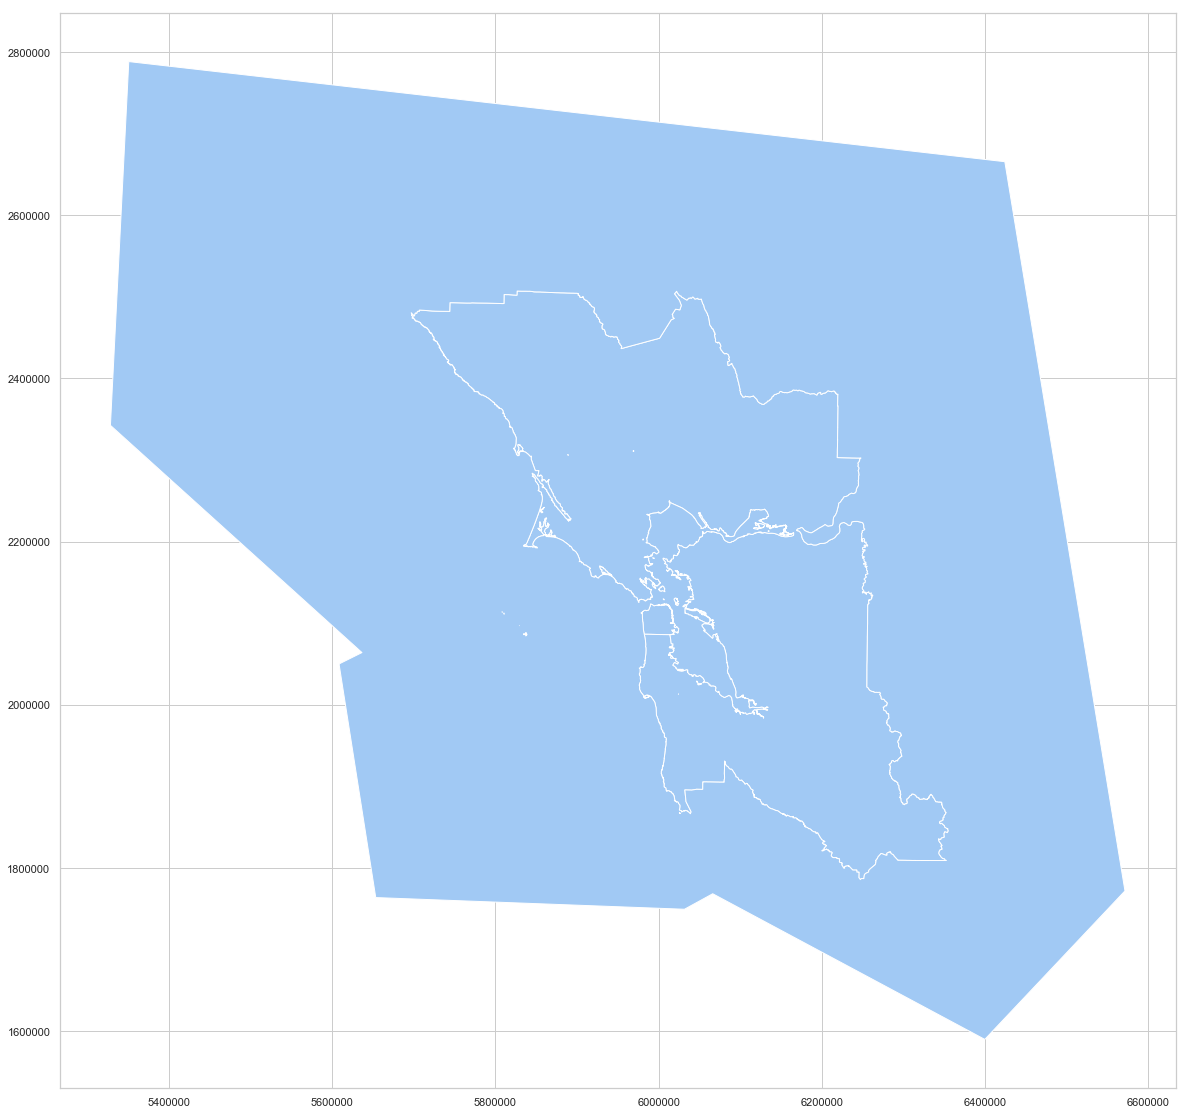

In [151]:
fig,ax= plt.subplots(figsize = (20,25))
shp_path.plot(ax = ax)

In [152]:
geometry = [Point(xy) for xy in zip (crime["Longitude"], crime["Latitude"])]
geometry[:5]

In [153]:
crs = {'init': 'epsg:4326'}

In [154]:
geo_df = gpd.GeoDataFrame(crime,
                         crs = crs,
                         geometry = geometry)

geo_df.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),geometry
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,182001522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,191610728.0,...,"(37.78268536745206, -122.42246374465972)",100.0,4.0,11.0,39.0,NaN,NaN,NaN,NaN,POINT (-122.4224637446597 37.78268536745206)
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,191521989.0,...,"(37.779090726308574, -122.46414497098554)",5.0,8.0,4.0,11.0,NaN,NaN,NaN,NaN,POINT (-122.4641449709855 37.77909072630858)


TypeError: 'GeoDataFrame' object is not callable

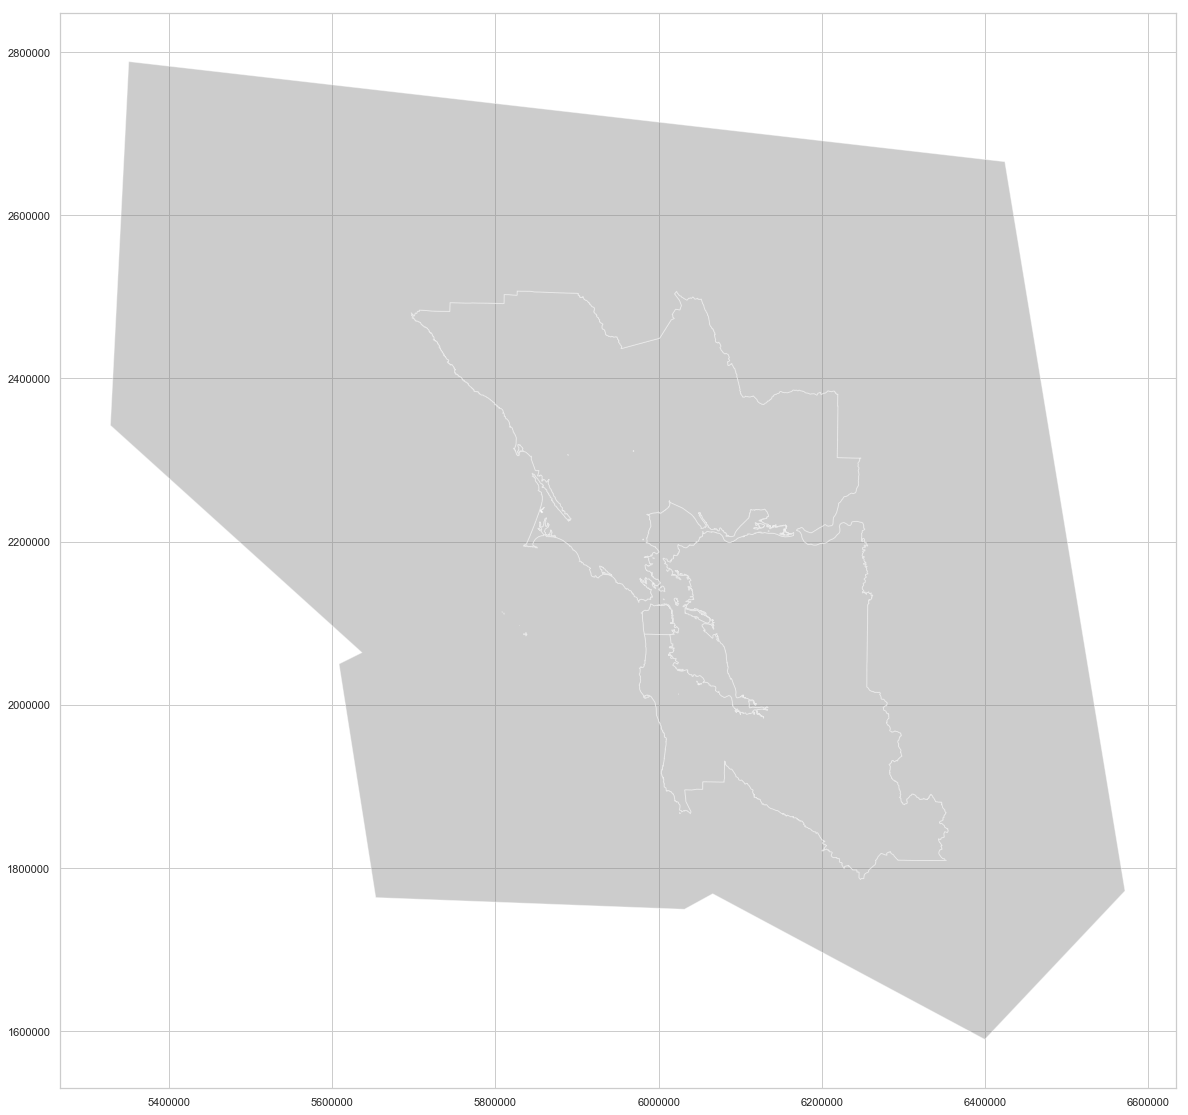

In [175]:
fig,ax = plt.subplots(figsize = [20,25])
shp_path.plot(ax = ax, alpha = 0.4, color = "grey")
#geo_df[geo_df["Row_ID"].plot(ax = ax, markersize = 20, color = "blue", market = "o")]
geo_df[geo_df("geometry")].plot